<a href="https://colab.research.google.com/github/mahasvinreddy07/ML_Project/blob/main/E_Commerce_Customer_Segmentation_and_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [36]:
data = pd.read_csv("/content/E-commerce_Satisfaction_Cleaned_ML_Ready.csv")
df = data.copy()
data.head()

,Customer ID,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Payment Method,Browsing Time (min),Total Purchases,Satisfaction Level
0,100000,56,Male,39,82,5,UPI,9,44,Medium
1,100001,46,Male,135,12,12,Debit Card,35,29,Low
2,100002,32,Female,82,50,7,Credit Card,27,2,Medium
3,100003,25,Male,70,21,9,Credit Card,25,44,Low
4,100004,38,Female,53,10,5,Cash,16,19,Low


In [37]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


df1 = df.copy()


gen_le = LabelEncoder()
pay_le = LabelEncoder()
sat_le = LabelEncoder()

df1["Gender"] = gen_le.fit_transform(df1["Gender"])
df1["Payment Method"] = pay_le.fit_transform(df1["Payment Method"])
df1["Satisfaction Level"] = sat_le.fit_transform(df1["Satisfaction Level"])


num_cols = [
    "Age",
    "Annual Income (k$)",
    "Spending Score (1-100)",
    "Purchase Frequency",
    "Browsing Time (min)",
    "Total Purchases"
]

scaler = MinMaxScaler()
df1[num_cols] = scaler.fit_transform(df1[num_cols])

df1.head()


,Customer ID,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Payment Method,Browsing Time (min),Total Purchases,Satisfaction Level
0,100000,0.926829,1,0.179104,0.826531,0.173913,3,0.035088,0.895833,2
1,100001,0.682927,1,0.895522,0.112245,0.478261,2,0.263158,0.583333,1
2,100002,0.341463,0,0.500000,0.500000,0.260870,1,0.192982,0.020833,2
3,100003,0.170732,1,0.410448,0.204082,0.347826,1,0.175439,0.895833,1
4,100004,0.487805,0,0.283582,0.091837,0.173913,0,0.096491,0.375000,1


In [38]:
data.shape

(12000, 10)

In [39]:
data.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Annual Income (k$),0
Spending Score (1-100),0
Purchase Frequency,0
Payment Method,0
Browsing Time (min),0
Total Purchases,0
Satisfaction Level,0


In [40]:
df =  data

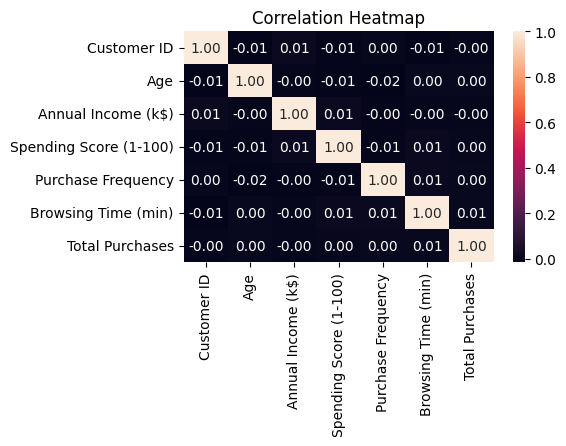

In [41]:
plt.figure(figsize=(5,3))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

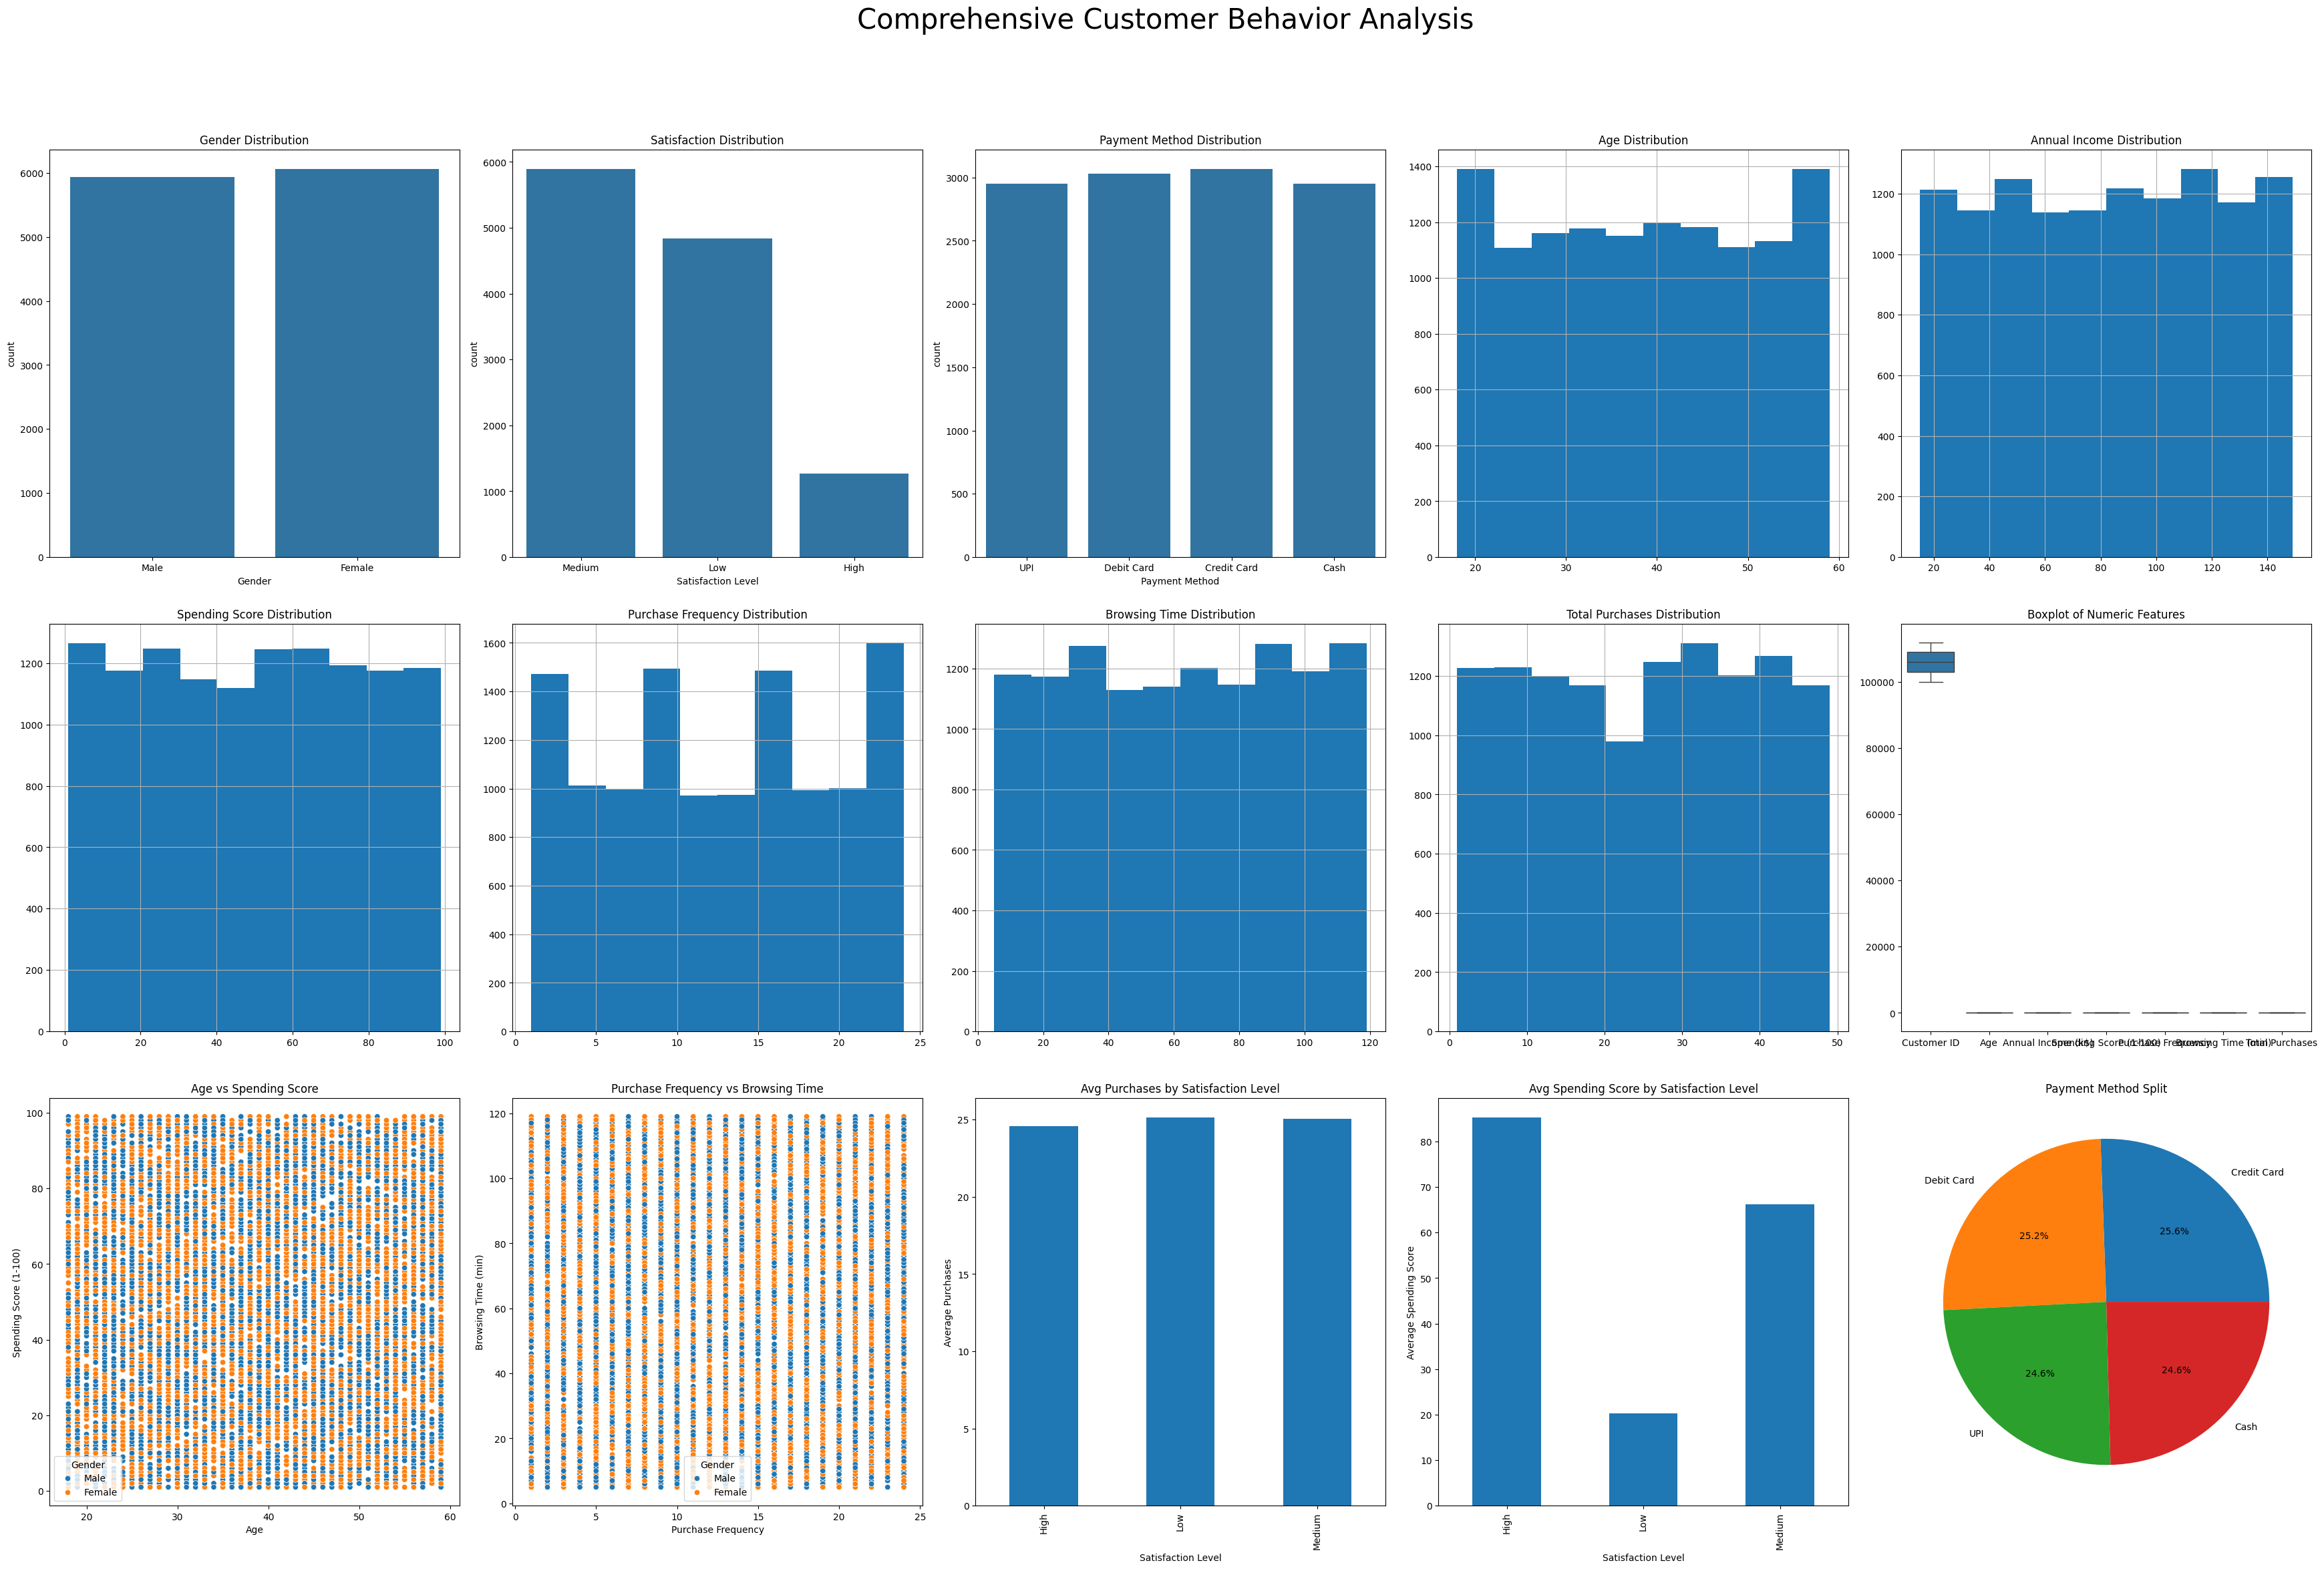

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(35, 30))
axes = axes.flatten()
ax_idx = 0


sns.countplot(x="Gender", data=df, ax=axes[ax_idx])
axes[ax_idx].set_title("Gender Distribution")
ax_idx += 1


sns.countplot(x="Satisfaction Level", data=df, ax=axes[ax_idx])
axes[ax_idx].set_title("Satisfaction Distribution")
ax_idx += 1


sns.countplot(x="Payment Method", data=df, ax=axes[ax_idx])
axes[ax_idx].set_title("Payment Method Distribution")
ax_idx += 1


df["Age"].hist(ax=axes[ax_idx], bins=10)
axes[ax_idx].set_title("Age Distribution")
ax_idx += 1


df["Annual Income (k$)"].hist(ax=axes[ax_idx], bins=10)
axes[ax_idx].set_title("Annual Income Distribution")
ax_idx += 1


df["Spending Score (1-100)"].hist(ax=axes[ax_idx], bins=10)
axes[ax_idx].set_title("Spending Score Distribution")
ax_idx += 1


df["Purchase Frequency"].hist(ax=axes[ax_idx], bins=10)
axes[ax_idx].set_title("Purchase Frequency Distribution")
ax_idx += 1


df["Browsing Time (min)"].hist(ax=axes[ax_idx], bins=10)
axes[ax_idx].set_title("Browsing Time Distribution")
ax_idx += 1


df["Total Purchases"].hist(ax=axes[ax_idx], bins=10)
axes[ax_idx].set_title("Total Purchases Distribution")
ax_idx += 1


sns.boxplot(data=df.select_dtypes(include=np.number), ax=axes[ax_idx])
axes[ax_idx].set_title("Boxplot of Numeric Features")
ax_idx += 1


sns.scatterplot(
    x="Age",
    y="Spending Score (1-100)",
    hue="Gender",
    data=df,
    ax=axes[ax_idx]
)
axes[ax_idx].set_title("Age vs Spending Score")
ax_idx += 1


sns.scatterplot(
    x="Purchase Frequency",
    y="Browsing Time (min)",
    hue="Gender",
    data=df,
    ax=axes[ax_idx]
)
axes[ax_idx].set_title("Purchase Frequency vs Browsing Time")
ax_idx += 1


df.groupby("Satisfaction Level")["Total Purchases"].mean().plot(
    kind="bar", ax=axes[ax_idx]
)
axes[ax_idx].set_title("Avg Purchases by Satisfaction Level")
axes[ax_idx].set_ylabel("Average Purchases")
ax_idx += 1


df.groupby("Satisfaction Level")["Spending Score (1-100)"].mean().plot(
    kind="bar", ax=axes[ax_idx]
)
axes[ax_idx].set_title("Avg Spending Score by Satisfaction Level")
axes[ax_idx].set_ylabel("Average Spending Score")
ax_idx += 1


df["Payment Method"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", ax=axes[ax_idx]
)
axes[ax_idx].set_title("Payment Method Split")
axes[ax_idx].set_ylabel("")
ax_idx += 1


for i in range(ax_idx, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Comprehensive Customer Behavior Analysis", fontsize=30, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


In [43]:
data.dropna(inplace = True)

In [44]:
X = data.drop(columns=["Satisfaction Level", "Customer ID"])
y = data["Satisfaction Level"]

X.head()

,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Payment Method,Browsing Time (min),Total Purchases
0,56,Male,39,82,5,UPI,9,44
1,46,Male,135,12,12,Debit Card,35,29
2,32,Female,82,50,7,Credit Card,27,2
3,25,Male,70,21,9,Credit Card,25,44
4,38,Female,53,10,5,Cash,16,19


In [45]:
str_col = X.select_dtypes(include=["object", "string"]).columns
num_col = X.select_dtypes(include=["int64", "double", "float"]).columns
str_col, num_col, X.columns

(Index(['Gender', 'Payment Method'], dtype='object'),
 Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
        'Purchase Frequency', 'Browsing Time (min)', 'Total Purchases'],
       dtype='object'),
 Index(['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)',
        'Purchase Frequency', 'Payment Method', 'Browsing Time (min)',
        'Total Purchases'],
       dtype='object'))

In [46]:
scaler = MinMaxScaler()

df1 = X.copy()


df1[num_col] = scaler.fit_transform(df1[num_col])

df1.head()


,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Payment Method,Browsing Time (min),Total Purchases
0,0.926829,Male,0.179104,0.826531,0.173913,UPI,0.035088,0.895833
1,0.682927,Male,0.895522,0.112245,0.478261,Debit Card,0.263158,0.583333
2,0.341463,Female,0.500000,0.500000,0.260870,Credit Card,0.192982,0.020833
3,0.170732,Male,0.410448,0.204082,0.347826,Credit Card,0.175439,0.895833
4,0.487805,Female,0.283582,0.091837,0.173913,Cash,0.096491,0.375000


In [47]:
from sklearn.preprocessing import LabelEncoder

gen_le = LabelEncoder()
pay_le = LabelEncoder()

# Encode categorical columns in df1 (features only)
df1["Gender"] = gen_le.fit_transform(df1["Gender"])
df1["Payment Method"] = pay_le.fit_transform(df1["Payment Method"])

df1.head()


,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Payment Method,Browsing Time (min),Total Purchases
0,0.926829,1,0.179104,0.826531,0.173913,3,0.035088,0.895833
1,0.682927,1,0.895522,0.112245,0.478261,2,0.263158,0.583333
2,0.341463,0,0.500000,0.500000,0.260870,1,0.192982,0.020833
3,0.170732,1,0.410448,0.204082,0.347826,1,0.175439,0.895833
4,0.487805,0,0.283582,0.091837,0.173913,0,0.096491,0.375000


In [48]:
df1.shape

(12000, 8)

In [49]:
df1.fillna(df1.mean(), inplace = True)
df1.isna().sum()

,0
Age,0
Gender,0
Annual Income (k$),0
Spending Score (1-100),0
Purchase Frequency,0
Payment Method,0
Browsing Time (min),0
Total Purchases,0


In [50]:
y_le = LabelEncoder()
y = y_le.fit_transform(y)
print("Original unique values of 'Satisfaction Level':", data["Satisfaction Level"].unique())

satisfaction_level_mapping = dict(zip(y_le.transform(y_le.classes_), y_le.classes_))
print("\nMapping of encoded values to original labels:", satisfaction_level_mapping)

Original unique values of 'Satisfaction Level': ['Medium' 'Low' 'High']

Mapping of encoded values to original labels: {np.int64(0): 'High', np.int64(1): 'Low', np.int64(2): 'Medium'}


In [51]:
df1.shape , y.shape

((12000, 8), (12000,))

In [52]:
linear_model = linear_model.LinearRegression()
logistic_model = LogisticRegression()
svm_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors = 3)
naive_model = GaussianNB()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2)

In [54]:
df1_columns_order = df1.columns.tolist()


In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 8), (2400, 8), (9600,), (2400,))

In [56]:
X_test.head(2)

,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Payment Method,Browsing Time (min),Total Purchases
2732,0.121951,0,0.552239,0.765306,0.782609,0,0.000000,0.500000
1992,0.024390,0,0.865672,0.948980,0.043478,2,0.315789,0.729167


In [57]:
logistic_model = logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [58]:
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9604166666666667

In [59]:
knn_model = knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.89125

In [60]:
naive_model = naive_model.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9725

In [61]:
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
naive_accuracy = accuracy_score(y_test, naive_model.predict(X_test))

accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes'],
    'Accuracy': [logistic_accuracy, svm_accuracy, knn_accuracy, naive_accuracy]
})

accuracy_df

,Model,Accuracy
0,Logistic Regression,0.966667
1,SVM,0.960417
2,KNN,0.891250
3,Naive Bayes,0.972500


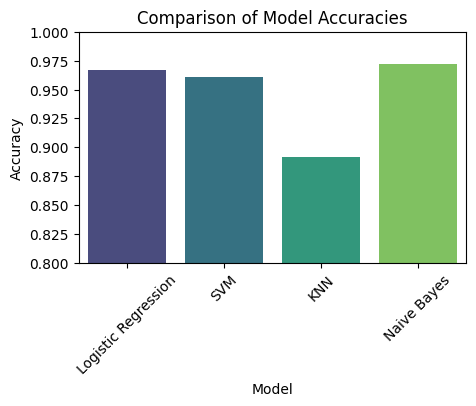

In [62]:
plt.figure(figsize=(5, 3))
plt.xticks(rotation=45)
sns.barplot(x='Model', y='Accuracy', hue='Model', data=accuracy_df, palette='viridis', legend=False)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.80, 1.00)
plt.show()

In [63]:
def predict(model, new_customer_data_dict, scaler, gen_le, pay_le, y_le, df1_columns_order):

    new_customer_df = pd.DataFrame([new_customer_data_dict])
    processed_customer_df = new_customer_df.copy()


    num_cols_for_prediction = [
        'Age',
        'Annual Income (k$)',
        'Spending Score (1-100)',
        'Purchase Frequency',
        'Browsing Time (min)',
        'Total Purchases'
    ]
    processed_customer_df[num_cols_for_prediction] = scaler.transform(
        processed_customer_df[num_cols_for_prediction]
    )


    processed_customer_df['Gender'] = gen_le.transform(processed_customer_df['Gender'])
    processed_customer_df['Payment Method'] = pay_le.transform(processed_customer_df['Payment Method'])


    processed_customer_df = processed_customer_df[df1_columns_order]


    predicted_satisfaction_encoded = model.predict(processed_customer_df)


    predicted_satisfaction_level = y_le.inverse_transform(predicted_satisfaction_encoded)

    print("Predicted Satisfaction Level for the new customer:", predicted_satisfaction_level[0])


In [64]:
new_customer_data = {
    'Age': 32,
    'Gender': 'Male',
    'Annual Income (k$)': 75,
    'Spending Score (1-100)': 68,
    'Purchase Frequency': 12,
    'Payment Method': 'Credit Card',
    'Browsing Time (min)': 35,
    'Total Purchases': 18
}


In [65]:

best_model = decision_model

predict(
    best_model,
    new_customer_data,
    scaler,
    gen_le,
    pay_le,
    y_le,
    df1_columns_order
)


Predicted Satisfaction Level for the new customer: Medium
